### Data preparation

In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline
sns.set()

In [5]:
df = pd.read_csv("data/train.csv", delimiter="|")

In [9]:
df.describe()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000
mean,3.401809,932.153273,50.864492,5.469931,4.904204,2.525279,0.058138,0.201746,0.745404,0.055349
std,1.709404,530.144640,28.940202,3.451169,3.139697,1.695472,0.278512,1.242135,1.327241,0.228720
min,1.000000,2.000000,0.010000,0.000000,0.000000,0.000000,0.000548,0.000007,0.000000,0.000000
25%,2.000000,474.500000,25.965000,2.000000,2.000000,1.000000,0.008384,0.027787,0.160000,0.000000
50%,3.000000,932.000000,51.210000,5.000000,5.000000,3.000000,0.016317,0.054498,0.350000,0.000000
75%,5.000000,1397.000000,77.285000,8.000000,8.000000,4.000000,0.032594,0.107313,0.666667,0.000000
max,6.000000,1831.000000,99.960000,11.000000,10.000000,5.000000,6.666667,37.870000,11.000000,1.000000


In [10]:
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


### Class distribution.

In [34]:
positive = df[df['fraud']==1].count()[0]
negative = df[df['fraud']==0].count()[0]
print("Frauds: {}, non-frauds: {}, all: {}".format(positive, negative, positive+negative))

Frauds: 104, non-frauds: 1775, all: 1879


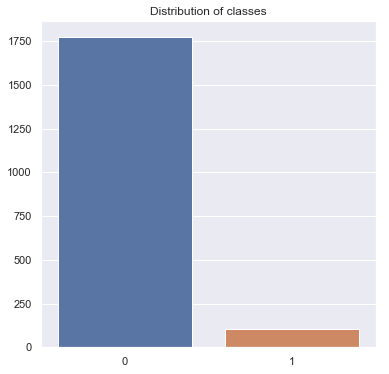

In [94]:
counts = [negative, positive]
plt.figure(figsize=(6,6))
plt.title("Distribution of classes")
sns.barplot(x=[0,1], y=counts)

### Features distributions

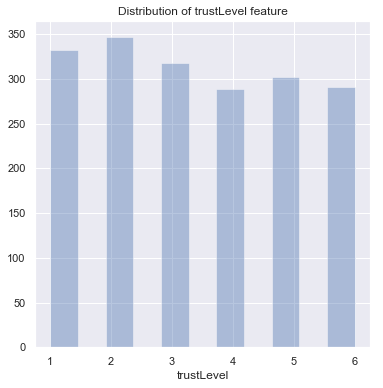

In [136]:
plt.figure(figsize=(6,6))
plt.title("Distribution of trustLevel feature")
sns.distplot(df.trustLevel, kde=False)

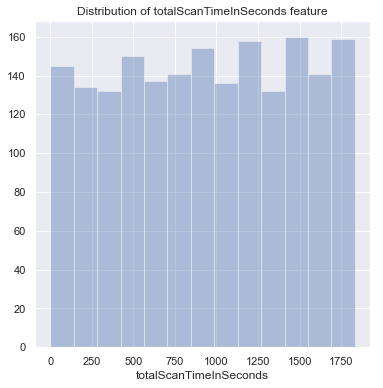

In [137]:
plt.figure(figsize=(6,6))
plt.title("Distribution of totalScanTimeInSeconds feature")
sns.distplot(df.totalScanTimeInSeconds, kde=False)

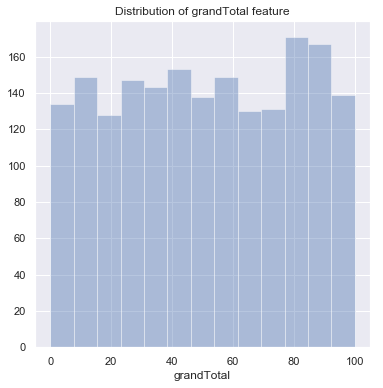

In [138]:
plt.figure(figsize=(6,6))
plt.title("Distribution of grandTotal feature")
sns.distplot(df.grandTotal, kde=False)

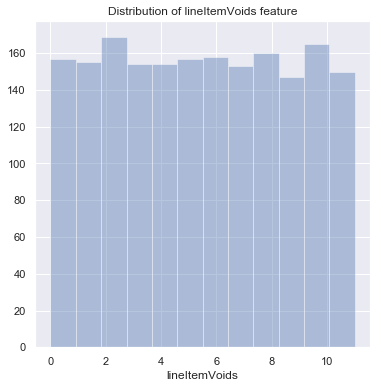

In [139]:
plt.figure(figsize=(6,6))
plt.title("Distribution of lineItemVoids feature")
sns.distplot(df.lineItemVoids, kde=False)

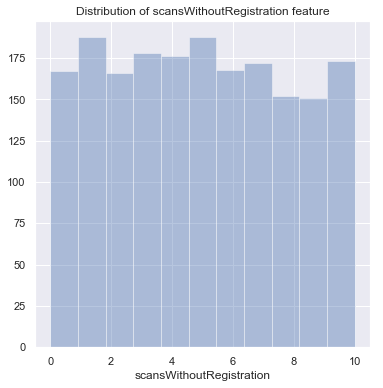

In [140]:
plt.figure(figsize=(6,6))
plt.title("Distribution of scansWithoutRegistration feature")
sns.distplot(df.scansWithoutRegistration, kde=False)

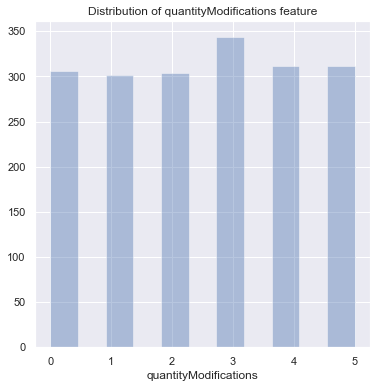

In [141]:
plt.figure(figsize=(6,6))
plt.title("Distribution of quantityModifications feature")
sns.distplot(df.quantityModifications, kde=False)

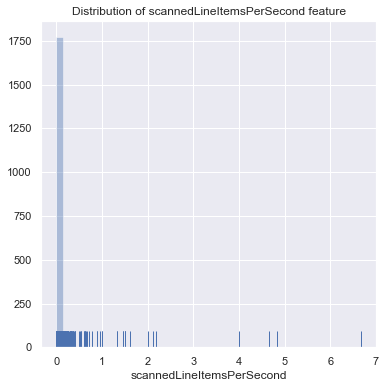

In [142]:
plt.figure(figsize=(6,6))
plt.title("Distribution of scannedLineItemsPerSecond feature")
sns.distplot(df.scannedLineItemsPerSecond, kde=False, rug=True)

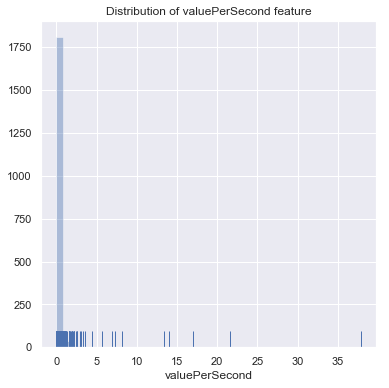

In [143]:
plt.figure(figsize=(6,6))
plt.title("Distribution of valuePerSecond feature")
sns.distplot(df.valuePerSecond, kde=False, rug=True)

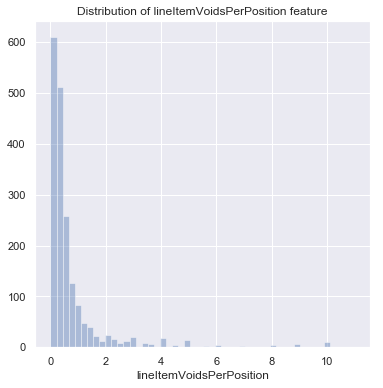

In [144]:
plt.figure(figsize=(6,6))
plt.title("Distribution of lineItemVoidsPerPosition feature")
sns.distplot(df.lineItemVoidsPerPosition, kde=False, rug=False)

### Correlations

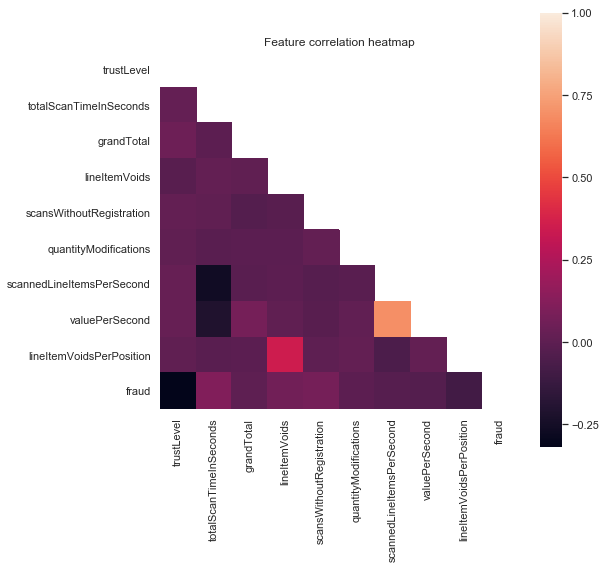

In [120]:
cmatrix = df.corr()
mask = np.zeros_like(cmatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(8,8))
    plt.title("Feature correlation heatmap")
    sns.heatmap(cmatrix, mask=mask, square=True)

### Trust level - closer look

It seems that the trust level does not correlate with the class value but it may be caused by the very uneven dristribution between classes. It may be profitable to check how this feature is ditributed among fraudulent and non-fraudulent transactions separately.

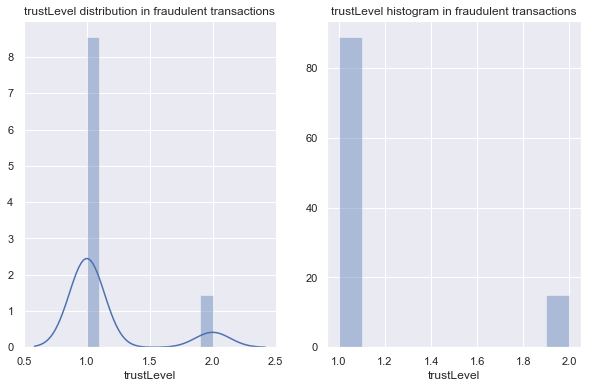

In [145]:
figure = plt.figure(figsize=(10,6))
ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)
ax1.set_title("trustLevel distribution in fraudulent transactions")
ax2.set_title("trustLevel histogram in fraudulent transactions")
sns.distplot(df[df['fraud']==1].trustLevel, kde=True, ax=ax1)
sns.distplot(df[df['fraud']==1].trustLevel, kde=False, ax=ax2)

Unique trustLevel feature values among fraud-postive transactions.

In [106]:
df[df['fraud']==1].trustLevel.unique()

array([1, 2])

It seems that the correlation indeed has been lost in the noise caused by the data distribution. In the subgroup of fraudulent transactions only trust levels 1 and 2 show up. 

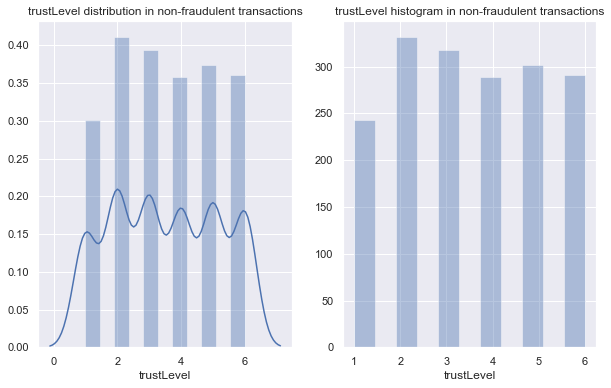

In [135]:
figure = plt.figure(figsize=(10,6))
ax1 = figure.add_subplot(121)
ax2 = figure.add_subplot(122)
ax1.set_title("trustLevel distribution in non-fraudulent transactions")
ax2.set_title("trustLevel histogram in non-fraudulent transactions")
sns.distplot(df[df['fraud']==0].trustLevel, kde=True, ax=ax1)
sns.distplot(df[df['fraud']==0].trustLevel, kde=False, ax=ax2)

Unique trustLevel feature values among fraud-negative transactions.

In [110]:
df[df['fraud']==0].trustLevel.unique()

array([5, 3, 6, 2, 4, 1])

In case of non-fraudulent transactions the distibution is more even. Although there is a significant decrease of transactions with trust level equal to 1. trustLevel may be a good indicator of whether the client clissifies for a follow-up check.

### Data subset creation

In [194]:
fraudulent = df[df['fraud']==1]
non_fraudulent = df[df['fraud']==0]
n = fraudulent.count()[0]
non_fraudulent_subset = non_fraudulent.sample(n)

In [195]:
n_fraudulent = fraudulent_subset.count()[0]
n_non_fraudulent = non_fraudulent_subset.count()[0]
print("Fraudulent transactions: {}, non-fraudulent transactions: {}".format(n_fraudulent, n_non_fraudulent))

Fraudulent transactions: 104, non-fraudulent transactions: 104


In [196]:
fraudulent.reset_index(drop=True, inplace=True)
non_fraudulent_subset.reset_index(drop=True, inplace=True)
dfs = pd.concat([fraudulent, non_fraudulent_subset])

In [197]:
dfs.count()[0]

208

In [198]:
dfs.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,1,770,11.09,11,5,2,0.033766,0.014403,0.423077,1
1,2,1397,62.59,7,9,4,0.017895,0.044803,0.280000,1
2,1,1385,34.68,5,8,4,0.019495,0.025040,0.185185,1
3,1,996,71.94,7,0,1,0.027108,0.072229,0.259259,1
4,2,1305,87.65,7,8,4,0.021456,0.067165,0.250000,1


In [199]:
dfs = dfs.sample(208).reset_index(drop=True)

In [200]:
dfs.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,2,1714,83.56,11,2,5,0.016336,0.048751,0.392857,1
1,2,1803,14.37,11,0,5,0.015530,0.007970,0.392857,1
2,4,1738,70.03,10,9,2,0.005754,0.040293,1.000000,0
3,5,521,78.70,11,10,5,0.013436,0.151056,1.571429,0
4,3,1705,71.83,0,6,2,0.002346,0.042129,0.000000,0


### Feature normalisation

In [213]:
x = dfs.drop('fraud', axis=1)
y = dfs['fraud']

x = sklearn.preprocessing.scale(x)

/mnt/c/Users/x250/Desktop/DMC/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


### t-SNE

In [186]:
from sklearn.manifold import TSNE

In [234]:
x_embedded = TSNE(n_components=2, random_state=50).fit_transform(x)

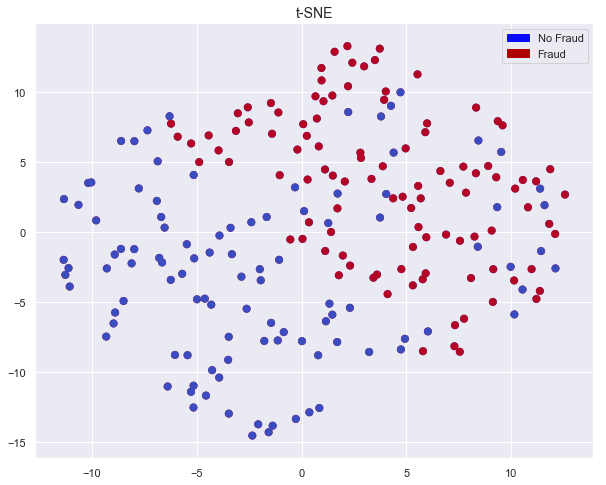

In [235]:
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(10,8))

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(x_embedded[:,0], x_embedded[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(x_embedded[:,0], x_embedded[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

### Training/test sets

In [251]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Random Forest

In [271]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [273]:
clf.feature_importances_

array([0.41094712, 0.08047656, 0.01398439, 0.0127247 , 0.02646481,
       0.00270227, 0.26642743, 0.07993822, 0.10633449])

In [272]:
clf.score(X_test, y_test)

0.9761904761904762

### KNN

In [274]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [275]:
neigh.score(X_test, y_test)

0.8333333333333334

### DecisionTree

In [276]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [277]:
tree.score(X_test, y_test)

0.9285714285714286